# STACKING ENSEMBLE


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:\\Users\\spoor\\Downloads\\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = dataset.iloc[:, [2, 3]].values # Age, EstimatedSalary
y = dataset.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define base models

In [7]:
base_models = [
('lr', LogisticRegression()),
('dt', DecisionTreeClassifier(max_depth=3)),
('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta model
Meta model decides how to conmbine predictions

In [8]:
meta_model=LogisticRegression()

# Build stacking classifier

In [9]:
classifier = StackingClassifier(
estimators=base_models,
final_estimator=meta_model,
cv=5
)
classifier.fit(X_train, y_train)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegression()
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [10]:
y_pred=classifier.predict(X_test)

In [11]:
acc=accuracy_score(y_test,y_pred)
acc

0.9

<Axes: >

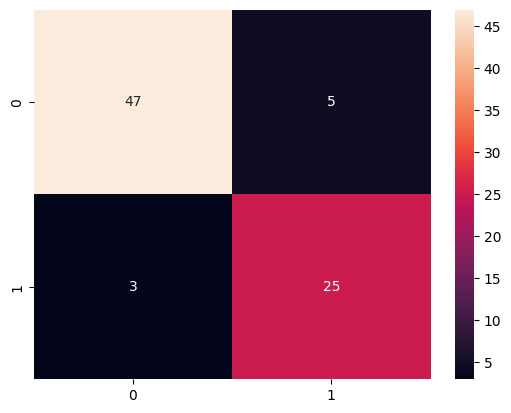

In [12]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# on house dataset

In [13]:
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")

zipcode_encoded = encoder.fit_transform(df[["zipcode"]]).toarray()

zipcode_df = pd.DataFrame(
    zipcode_encoded,
    columns=encoder.get_feature_names_out(["zipcode"])
)

df = pd.concat([df.drop(columns=["zipcode"]), zipcode_df], axis=1)


In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df=df.drop(columns=["date"])


In [18]:
x = df.drop("price", axis=1)
Y = df["price"]

x_train, x_test, Y_train, Y_test = train_test_split(
    x, Y, test_size=0.2, random_state=42
)


**Task 2: Build Base Models**  
Train at least THREE different base models from the list below:  
Logistic Regression  
Decision Tree  
KNN  
Random Forest  
Support Vector Machine  
For each base model:  
Train the model using training data  
Evaluate performance using:  
Accuracy  
Display results clearly

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
de = DecisionTreeClassifier(random_state=42)
de.fit(x_train, Y_train)

Y_pred_de = de.predict(x_test)
acc_de = accuracy_score(Y_test, Y_pred_de)


In [21]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train, Y_train)

Y_pred_kn = kn.predict(x_test)
acc_kn = accuracy_score(Y_test, Y_pred_kn)


In [22]:
rc = RandomForestClassifier(n_estimators=50,
    max_depth=20,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1)
rc.fit(x_train, Y_train)

Y_pred_rc = rc.predict(x_test)
acc_rc = accuracy_score(Y_test, Y_pred_rc)


In [24]:
print("Model Performance (Accuracy):")
print(f"Decision Tree       : {acc_de:.4f}")
print(f"KNN                 : {acc_kn:.4f}")
print(f"Random Forest       : {acc_rc:.4f}")


Model Performance (Accuracy):
Decision Tree       : 0.0093
KNN                 : 0.0056
Random Forest       : 0.0176


**Task 3: Implement Stacking Model (CORE TASK)**  
Use predictions from base models as input features  
Train a meta-model (Logistic Regression is recommended)  
Ensure:  
No data leakage  
Proper train–test separation  

In [27]:
de_train_pred = de.predict(x_train)
kn_train_pred = kn.predict(x_train)
rc_train_pred = rc.predict(x_train)


In [28]:
de_test_pred = de.predict(x_test)
kn_test_pred = kn.predict(x_test)
rc_test_pred = rc.predict(x_test)


In [29]:
x_meta_train = np.column_stack((
    de_train_pred,
    kn_train_pred,
    rc_train_pred
))

x_meta_test = np.column_stack((
    de_test_pred,
    kn_test_pred,
    rc_test_pred
))


In [30]:
meta_model = LogisticRegression()
meta_model.fit(x_meta_train, Y_train)


C:\Users\spoor\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
from sklearn.metrics import accuracy_score

stacked_pred = meta_model.predict(x_meta_test)
stacked_acc = accuracy_score(Y_test, stacked_pred)

print("Stacking Model Accuracy:", stacked_acc)


Stacking Model Accuracy: 0.004626416840157298
